                                               **Project - 95**
                                          
                                        -- Money Laundering Detection --

# Business Problem :

 ## Designing and Executing an Anti-Money Laundering Program: Minimizing Risk and Adhering to Regulatory Requirements

## Developing and Implementing an Effective Anti-Money Laundering Strategy: Mitigating Financial Risk and Ensuring Compliance. Detection of Money Laundering Activity.
        
        
## Business Objective :

   ### Minimise :
   
        Due diligence
        Financial crimes/risks
        Corruption with report
        Operational inefficiencies
        False Alarms
        
## Business Constraints :

   ### Maximise :
   
        Effective Transaction monitoring
        Effective reporting mechanism
        Compliance measures
        AML Policies
        Customer Convenience"

In [14]:
## Importing required libraries for analysis

import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
## Loading the dataset to Preprocess the data
df = pd.read_csv("Money_Laundering_Dataset.csv")
df

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,2.0,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,3.0,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,4.0,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,10.0,PAYMENT,4020.66,C1410794718,NaN,155908.34,M1257036576,0.00,0.00,NaN,0.0
99996,99996.0,10.0,PAYMENT,18345.49,C744303677,NaN,0.00,M1785344556,0.00,0.00,NaN,0.0
99997,99997.0,10.0,CASH_IN,183774.91,C104331851,NaN,222947.91,C36392889,54925.05,0.00,NaN,0.0
99998,99998.0,10.0,CASH_OUT,82237.17,C707662966,NaN,0.00,C1553004158,592635.66,799140.46,NaN,0.0


In [16]:
## Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      99997 non-null   float64
 1   step            99323 non-null   float64
 2   type            100000 non-null  object 
 3   amount          100000 non-null  float64
 4   nameOrig        99990 non-null   object 
 5   oldbalanceOrg   99857 non-null   float64
 6   newbalanceOrig  99978 non-null   float64
 7   nameDest        99996 non-null   object 
 8   oldbalanceDest  99948 non-null   float64
 9   newbalanceDest  100000 non-null  float64
 10  isFraud         99683 non-null   float64
 11  isFlaggedFraud  99929 non-null   float64
dtypes: float64(9), object(3)
memory usage: 9.2+ MB


In [17]:
## Finding null values
df.isna().sum()

Unnamed: 0          3
step              677
type                0
amount              0
nameOrig           10
oldbalanceOrg     143
newbalanceOrig     22
nameDest            4
oldbalanceDest     52
newbalanceDest      0
isFraud           317
isFlaggedFraud     71
dtype: int64

In [19]:
import sweetviz as sv

##Generate Auto EDA using Sweetviz
my_report = sv.analyze(df)
my_report.show_html() 

## Default arguments will generate to SWEETVIZ.html.

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Null Values are present and need to perform SimpleImputer Median for Numerical & Most_Frequent to categorical variable.

In [20]:
## Finding duplicates in Rows
df.duplicated().sum()

0

In [21]:
## Finding duplicates in columns
df.transpose().duplicated().sum()

0

#### No Dupliacted values found in Columns & Rows

In [22]:
## Dropping un-useful column
df = df.drop('Unnamed: 0', axis=1)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,NaN,155908.34,M1257036576,0.00,0.00,NaN,0.0
99996,10.0,PAYMENT,18345.49,C744303677,NaN,0.00,M1785344556,0.00,0.00,NaN,0.0
99997,10.0,CASH_IN,183774.91,C104331851,NaN,222947.91,C36392889,54925.05,0.00,NaN,0.0
99998,10.0,CASH_OUT,82237.17,C707662966,NaN,0.00,C1553004158,592635.66,799140.46,NaN,0.0


In [23]:
## Using Median Simple Imputer to convert Null Values Present in Numericals

from sklearn.impute import SimpleImputer

# Separate the columns with missing values
missing_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']

imputer = SimpleImputer(strategy='median')

# Impute the missing values
df[missing_cols] = imputer.fit_transform(df[missing_cols])

In [24]:
## Most_Frequent for convertinig null values for Categorical Variable

from sklearn.impute import SimpleImputer

# Separate the columns with missing values
missing_col1 = ['step', 'nameOrig', 'nameDest','isFraud','isFlaggedFraud']

# Create a KNN imputer object
imputer = SimpleImputer(strategy='most_frequent')

# Impute the missing values
df[missing_col1] = imputer.fit_transform(df[missing_col1])

#### Getting Zero Null Values after using Imputation technique to convert the null values into categorical values.

In [25]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

###  This will helpp us to check if there are any mismatches in the balance at the origin and destination after a transaction is made, and calculates the percentage of transactions that have balance errors.

In [26]:
print("Are there any mismatch in the balance at origin and destination after transaction?")
df['error_orig'] = (df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]).astype(int)
df['error_dest'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"]).astype(int)

print("Balance Error(%) at the Sender:",round(df['error_orig'].value_counts()/df.shape[0] * 100,2))
print("Balance Error(%) at the Receiver:",round(df['error_dest'].value_counts()/df.shape[0] * 100,2))

#print("Valid Balance(%) at the origin:",round(data['error_orig'].value_counts()[0]/data.shape[0] * 100,2))
#print("Valid Balance(%) at the dest:",round(data['error_dest'].value_counts()[0]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the Sender: 1    98.4
0     1.6
Name: error_orig, dtype: float64
Balance Error(%) at the Receiver: 1    92.73
0     7.27
Name: error_dest, dtype: float64


#### creates two new columns in a pandas DataFrame df, newbalanceSender and newbalanceReceiver, which represent the updated balances for the sender and receiver accounts after a transaction has occurred. Also, this helps us to  ensure that the transactions have been processed correctly and that the account balances have been updated appropriately.

In [27]:
df['newbalanceSender']= df['oldbalanceOrg'] - df['amount'].astype(float)
df['newbalanceReceiver'] = df['oldbalanceDest'] + df['amount'].astype(float)

In [28]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_orig,error_dest,newbalanceSender,newbalanceReceiver
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0,0,1,160296.36,9839.64
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0,0,1,19384.72,1864.28
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0,0,1,0.00,181.00
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0,0,1,0.00,21363.00
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0,0,1,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,20100.0,155908.34,M1257036576,0.00,0.00,0.0,0.0,1,1,16079.34,4020.66
99996,10.0,PAYMENT,18345.49,C744303677,20100.0,0.00,M1785344556,0.00,0.00,0.0,0.0,1,1,1754.51,18345.49
99997,10.0,CASH_IN,183774.91,C104331851,20100.0,222947.91,C36392889,54925.05,0.00,0.0,0.0,1,1,-163674.91,238699.96
99998,10.0,CASH_OUT,82237.17,C707662966,20100.0,0.00,C1553004158,592635.66,799140.46,0.0,0.0,1,1,-62137.17,674872.83


In [29]:
### Replacing negative integers with zero using a lambda function. Neg Values are Present in newbalanceSender

df['newbalanceSender'] = df['newbalanceSender'].apply(lambda x: 0 if x < 0 else x)

# print the updated DataFrame
print(df)

       step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0       1.0   PAYMENT    9839.64  C1231006815       170136.0       160296.36   
1       1.0   PAYMENT    1864.28  C1666544295        21249.0        19384.72   
2       1.0  TRANSFER     181.00  C1305486145          181.0            0.00   
3       1.0  CASH_OUT     181.00   C840083671          181.0            0.00   
4       1.0   PAYMENT   11668.14  C2048537720        41554.0        29885.86   
...     ...       ...        ...          ...            ...             ...   
99995  10.0   PAYMENT    4020.66  C1410794718        20100.0       155908.34   
99996  10.0   PAYMENT   18345.49   C744303677        20100.0            0.00   
99997  10.0   CASH_IN  183774.91   C104331851        20100.0       222947.91   
99998  10.0  CASH_OUT   82237.17   C707662966        20100.0            0.00   
99999  10.0   PAYMENT   20096.56  C1868032458        20100.0        90020.44   

          nameDest  oldbalanceDest  new

#### Lets us to check if there are any mismatches in the balance at the origin and destination after a transaction is made, and calculates the percentage of transactions that have balance error

In [30]:
print("Are there any mismatch in the balance at origin and destination after transaction?")
df['error_orig'] = (df["oldbalanceOrg"] - df["amount"] <= df["newbalanceSender"]).astype(int)
df['error_dest'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceReceiver"]).astype(int)

print("Balance Error(%) at the Sender:",round(df['error_orig'].value_counts()/df.shape[0] * 100,2))
print("Balance Error(%) at the Receiver:",round(df['error_dest'].value_counts()/df.shape[0] * 100,2))

#print("Valid Balance(%) at the origin:",round(data['error_orig'].value_counts()[0]/data.shape[0] * 100,2))
#print("Valid Balance(%) at the dest:",round(data['error_dest'].value_counts()[0]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the Sender: 1    100.0
Name: error_orig, dtype: float64
Balance Error(%) at the Receiver: 0    100.0
Name: error_dest, dtype: float64


In [31]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_orig,error_dest,newbalanceSender,newbalanceReceiver
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0,1,0,160296.36,9839.64
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0,1,0,19384.72,1864.28
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0,1,0,0.00,181.00
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0,1,0,0.00,21363.00
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0,1,0,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,20100.0,155908.34,M1257036576,0.00,0.00,0.0,0.0,1,0,16079.34,4020.66
99996,10.0,PAYMENT,18345.49,C744303677,20100.0,0.00,M1785344556,0.00,0.00,0.0,0.0,1,0,1754.51,18345.49
99997,10.0,CASH_IN,183774.91,C104331851,20100.0,222947.91,C36392889,54925.05,0.00,0.0,0.0,1,0,0.00,238699.96
99998,10.0,CASH_OUT,82237.17,C707662966,20100.0,0.00,C1553004158,592635.66,799140.46,0.0,0.0,1,0,0.00,674872.83


In [32]:
## Dropping the unrequired columns 
df = df.drop(['error_orig','error_dest','newbalanceOrig','newbalanceDest'],axis = 1)
df

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,newbalanceSender,newbalanceReceiver
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.00,0.0,0.0,160296.36,9839.64
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.00,0.0,0.0,19384.72,1864.28
2,1.0,TRANSFER,181.00,C1305486145,181.0,C553264065,0.00,1.0,0.0,0.00,181.00
3,1.0,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.00,1.0,0.0,0.00,21363.00
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.00,0.0,0.0,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,20100.0,M1257036576,0.00,0.0,0.0,16079.34,4020.66
99996,10.0,PAYMENT,18345.49,C744303677,20100.0,M1785344556,0.00,0.0,0.0,1754.51,18345.49
99997,10.0,CASH_IN,183774.91,C104331851,20100.0,C36392889,54925.05,0.0,0.0,0.00,238699.96
99998,10.0,CASH_OUT,82237.17,C707662966,20100.0,C1553004158,592635.66,0.0,0.0,0.00,674872.83


In [33]:
## Converting the Object into Integer

df['isFraud']= df['isFraud'].astype('int64')
df['step']= df['step'].astype('int64')
df['isFlaggedFraud']= df['isFlaggedFraud'].astype('int64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   step                100000 non-null  int64  
 1   type                100000 non-null  object 
 2   amount              100000 non-null  float64
 3   nameOrig            100000 non-null  object 
 4   oldbalanceOrg       100000 non-null  float64
 5   nameDest            100000 non-null  object 
 6   oldbalanceDest      100000 non-null  float64
 7   isFraud             100000 non-null  int64  
 8   isFlaggedFraud      100000 non-null  int64  
 9   newbalanceSender    100000 non-null  float64
 10  newbalanceReceiver  100000 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [35]:
## Renaming the column names as mentioned

df = df.rename(columns={'newbalanceSender': 'newbalanceOrg', 'newbalanceReceiver': 'newbalanceDest'})
df

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,newbalanceOrg,newbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.00,0,0,160296.36,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.00,0,0,19384.72,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.00,1,0,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.00,1,0,0.00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.00,0,0,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,C1410794718,20100.0,M1257036576,0.00,0,0,16079.34,4020.66
99996,10,PAYMENT,18345.49,C744303677,20100.0,M1785344556,0.00,0,0,1754.51,18345.49
99997,10,CASH_IN,183774.91,C104331851,20100.0,C36392889,54925.05,0,0,0.00,238699.96
99998,10,CASH_OUT,82237.17,C707662966,20100.0,C1553004158,592635.66,0,0,0.00,674872.83


In [36]:
# Rearranging the columns

df = df[['step','type','amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]

# print the rearranged DataFrame

print('Rearranged DataFrame:')
df.columns

Rearranged DataFrame:


Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrg',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

### First Business Moment Decision

In [37]:
## Calculates the Mean (average) of the values in the 'amount' column
df['amount'].mean()

173602.22176409996

In [38]:
## Calculates the Median value of the 'amount' column

df['amount'].median()

52745.520000000004

In [39]:
## Calculates the Mode value of the 'amount' column

df['amount'].mode()

0     2475.13
1     6285.19
2    17320.91
3    25975.86
4    29707.86
5    89631.24
Name: amount, dtype: float64

### Second Business Moment Decision

In [40]:
## Checking the Variance in 'amount' columns.
df['amount'].var()

118542710414.3486

In [41]:
## Calculates the standard deviation of the values in the 'amount' column
df['amount'].std()

344300.3200903952

### Third Business Moment Decision

In [42]:
## Calculating the Skewness of each column in dataset.
df.skew()

step               -2.543341
amount              5.428317
oldbalanceOrg       4.958011
newbalanceOrg       5.044601
oldbalanceDest      5.058239
newbalanceDest      4.766104
isFraud            15.426444
isFlaggedFraud    316.227766
dtype: float64

### Fourth Business Moment Decision

In [43]:
## Calculating the Kurtosis of each column in dataset.
df.kurt()

step                   7.313596
amount                48.099033
oldbalanceOrg         31.579922
newbalanceOrg         32.616930
oldbalanceDest        32.493201
newbalanceDest        29.197520
isFraud              235.979882
isFlaggedFraud    100000.000000
dtype: float64

<Axes: >

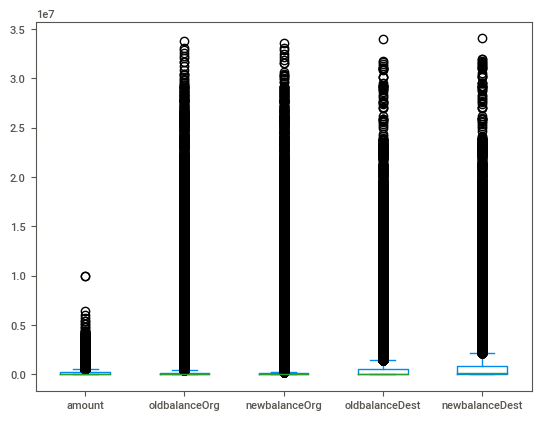

In [44]:
# Creating box plot to check outliers

df[['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest']].plot(kind='box')

### Loops through a list of selected columns in a pandas DataFrame and calculates the percentage of outliers in each column.

In [45]:
# Define the columns you want to loop through
columns_to_loop = ['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest',]

# Loop through the selected columns and calculate the percentage of outliers
for column in columns_to_loop:
    data_column = df[column].values

    # Define the lower and upper bounds of the range of non-outliers
    q1, q3 = np.percentile(data_column, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Calculate the number of outliers
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    num_outliers = len(outliers)

    # Calculate the percentage of outliers
    percent_outliers = (num_outliers / len(data_column)) * 100

    print("Column:", column)
    print("Percentage of outliers:", percent_outliers)

Column: amount
Percentage of outliers: 6.4
Column: oldbalanceOrg
Percentage of outliers: 18.337999999999997
Column: newbalanceOrg
Percentage of outliers: 20.047
Column: oldbalanceDest
Percentage of outliers: 14.173
Column: newbalanceDest
Percentage of outliers: 11.919


### Creating the correlation matrix & Heatmap of matrix which shows the correlation values between the different features with positive correlations shown in warm colors (reds) and negative correlations shown in cool colors (blues). The darker the color, the stronger the correlation between two features.

### Can understand the relationships between different variables in the dataset 

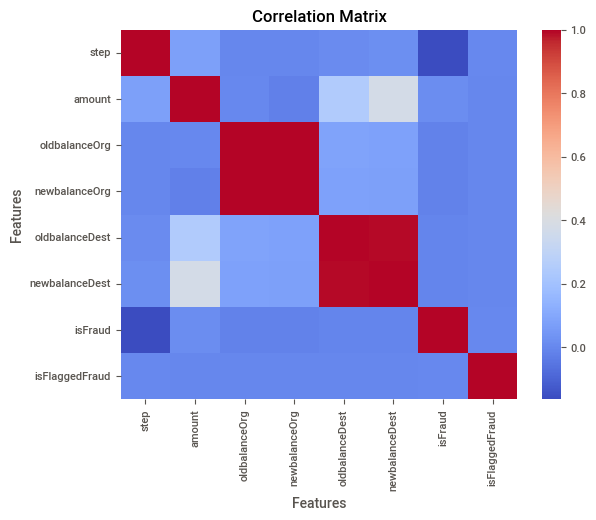

In [46]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')

# Add title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

## Data Visualization
### Count Plots

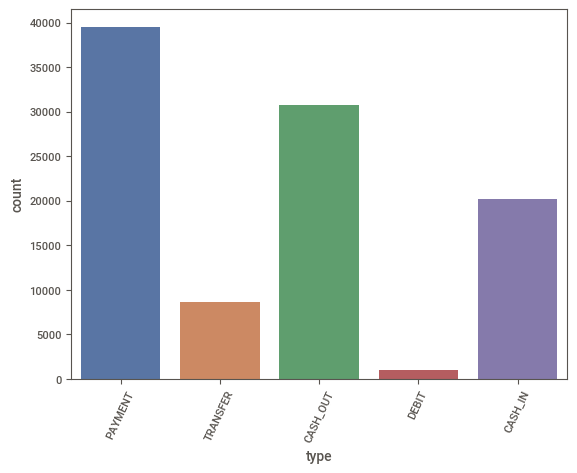

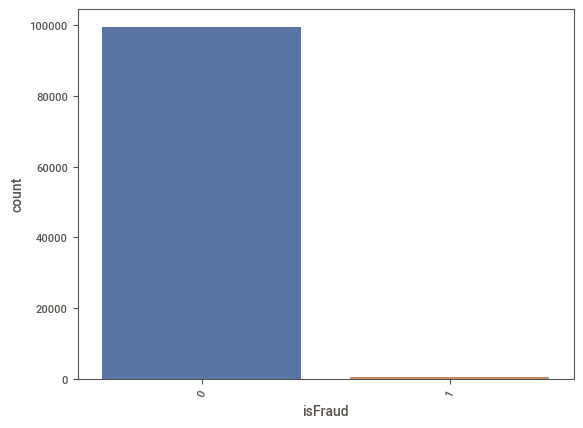

In [47]:
features_category = ['type','isFraud']
for feature in features_category:
  sns.countplot(data=df, x=feature, palette='deep')
  plt.xticks(rotation=65)
  plt.show()

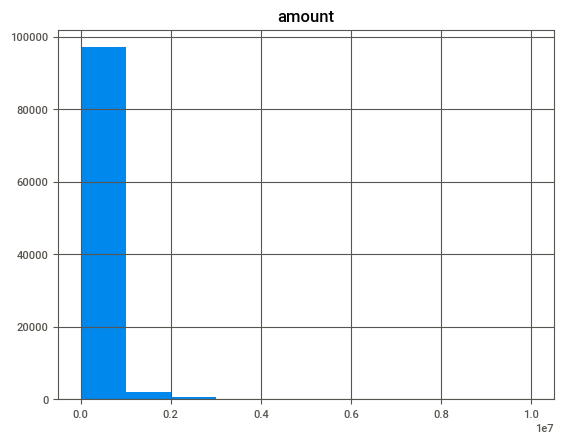

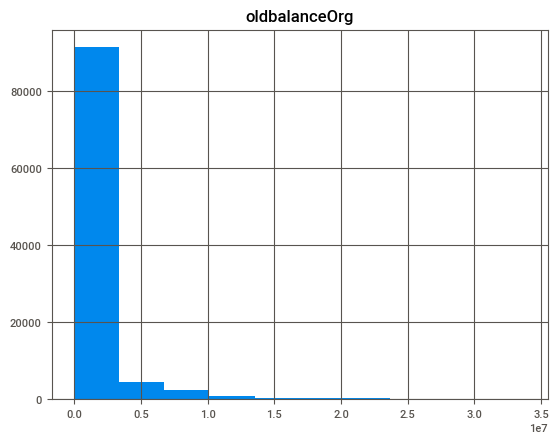

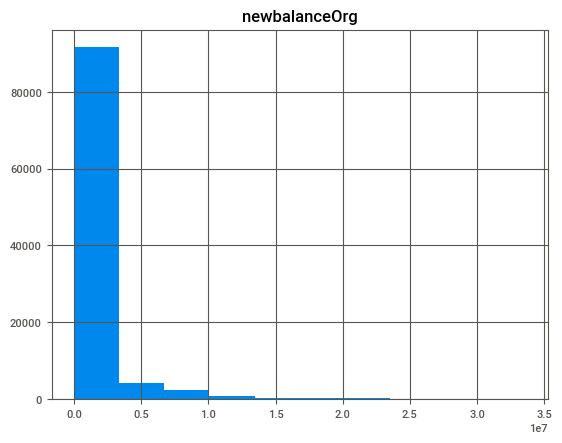

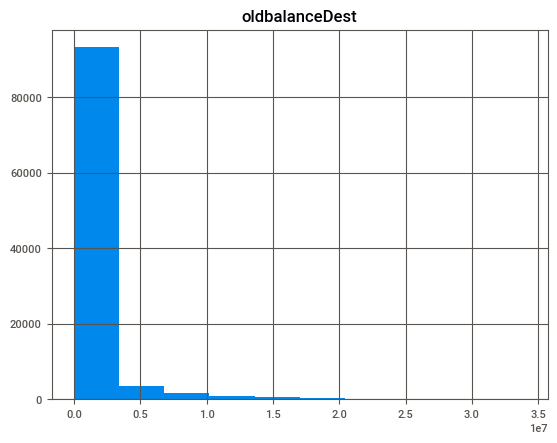

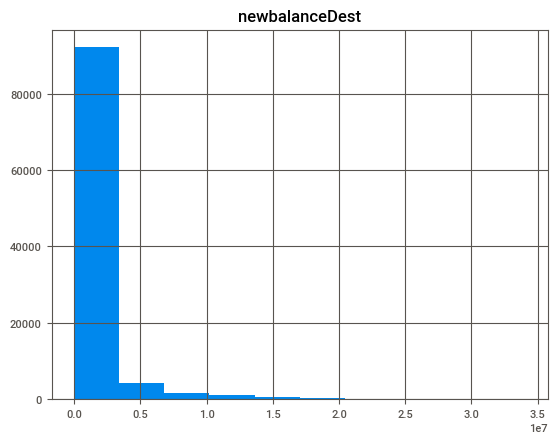

In [48]:
## Select columns for which histograms to be created

cols = ['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest']

#for loop to create histograms 
for col in cols:      #iterate over the columns in the dataset 
    df[col].hist()   #create a histogram of the current column 
    plt.title(col)   #set title as the current column 
    plt.show()

### Count plot using seaborn library, Plot displays the frequency distribution. The absolute count values of each corresponding bar in the plot. 

[Text(0, 0, '39512'),
 Text(0, 0, '30718'),
 Text(0, 0, '20185'),
 Text(0, 0, '8597'),
 Text(0, 0, '988')]

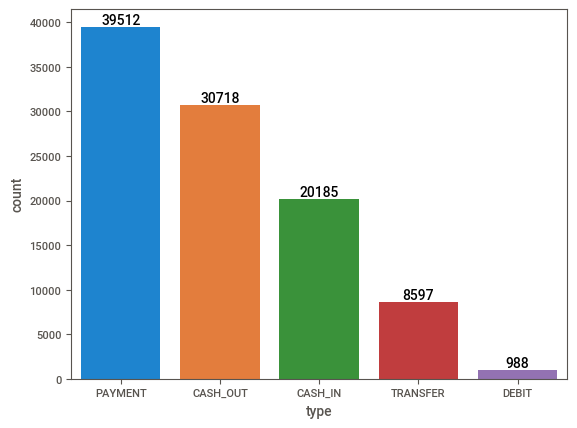

In [49]:
ax = sns.countplot(x = df['type'],
                   order = df['type'].value_counts (ascending=False).index);
abs_values = df['type'].value_counts (ascending = False).values 
                          
ax.bar_label (container=ax.containers[0], labels=abs_values)

### Converting the Step which is in Hours to be converted into Time Format which will help in differentiating

In [50]:
## Converting step into time
df['step'] = pd.to_datetime("01/01/2022") + pd.to_timedelta(df['step'], unit='h')
df['step'].sample(10)

24656   2022-01-01 08:00:00
39336   2022-01-01 09:00:00
31175   2022-01-01 08:00:00
17049   2022-01-01 08:00:00
91601   2022-01-01 10:00:00
30742   2022-01-01 08:00:00
18138   2022-01-01 08:00:00
43409   2022-01-01 09:00:00
23895   2022-01-01 08:00:00
80982   2022-01-01 10:00:00
Name: step, dtype: datetime64[ns]

### Converting & Creating new column by converting time into Night, Morning, Afternoon, Evening, by converting Step into Hours Basis

In [51]:
# create new column to get morning, afternoon, evening, or night
df['step'] = pd.cut(df['step'].dt.hour,
                        bins=[0, 6, 12, 18, 24], 
                        labels = ['night','morning','afternoon','evening'],
                        include_lowest = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   step            100000 non-null  category
 1   type            100000 non-null  object  
 2   amount          100000 non-null  float64 
 3   oldbalanceOrg   100000 non-null  float64 
 4   newbalanceOrg   100000 non-null  float64 
 5   oldbalanceDest  100000 non-null  float64 
 6   newbalanceDest  100000 non-null  float64 
 7   isFraud         100000 non-null  int64   
 8   isFlaggedFraud  100000 non-null  int64   
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 6.2+ MB


### Creating a Pie Chart for categorical variable 'Step'. 

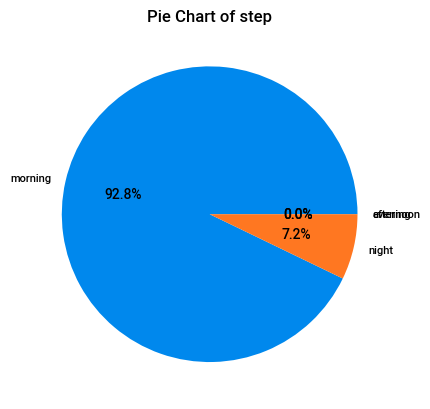

In [52]:
features_object = ['step']
for column_name in features_object:
    column_data = df[column_name]
    value_counts = column_data.value_counts()
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column_name}')
    plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   step            100000 non-null  category
 1   type            100000 non-null  object  
 2   amount          100000 non-null  float64 
 3   oldbalanceOrg   100000 non-null  float64 
 4   newbalanceOrg   100000 non-null  float64 
 5   oldbalanceDest  100000 non-null  float64 
 6   newbalanceDest  100000 non-null  float64 
 7   isFraud         100000 non-null  int64   
 8   isFlaggedFraud  100000 non-null  int64   
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 6.2+ MB


In [54]:
df = df.drop(['isFlaggedFraud'],axis=1)
df

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,night,PAYMENT,9839.64,170136.0,160296.36,0.00,9839.64,0
1,night,PAYMENT,1864.28,21249.0,19384.72,0.00,1864.28,0
2,night,TRANSFER,181.00,181.0,0.00,0.00,181.00,1
3,night,CASH_OUT,181.00,181.0,0.00,21182.00,21363.00,1
4,night,PAYMENT,11668.14,41554.0,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...,...
99995,morning,PAYMENT,4020.66,20100.0,16079.34,0.00,4020.66,0
99996,morning,PAYMENT,18345.49,20100.0,1754.51,0.00,18345.49,0
99997,morning,CASH_IN,183774.91,20100.0,0.00,54925.05,238699.96,0
99998,morning,CASH_OUT,82237.17,20100.0,0.00,592635.66,674872.83,0


In [55]:
df["type"].value_counts()

PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: type, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   step            100000 non-null  category
 1   type            100000 non-null  object  
 2   amount          100000 non-null  float64 
 3   oldbalanceOrg   100000 non-null  float64 
 4   newbalanceOrg   100000 non-null  float64 
 5   oldbalanceDest  100000 non-null  float64 
 6   newbalanceDest  100000 non-null  float64 
 7   isFraud         100000 non-null  int64   
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 5.4+ MB


In [57]:
## Dropping the step column to perform and build the model based on remaining columns
df1 = df.drop(['step'], axis=1)
df1

,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.00,9839.64,0
1,PAYMENT,1864.28,21249.0,19384.72,0.00,1864.28,0
2,TRANSFER,181.00,181.0,0.00,0.00,181.00,1
3,CASH_OUT,181.00,181.0,0.00,21182.00,21363.00,1
4,PAYMENT,11668.14,41554.0,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...
99995,PAYMENT,4020.66,20100.0,16079.34,0.00,4020.66,0
99996,PAYMENT,18345.49,20100.0,1754.51,0.00,18345.49,0
99997,CASH_IN,183774.91,20100.0,0.00,54925.05,238699.96,0
99998,CASH_OUT,82237.17,20100.0,0.00,592635.66,674872.83,0


In [58]:
# get all categorical columns in the dataframe
catCols = [col for col in df1.columns if df1[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    df1[item] = lb_make.fit_transform(df1[item])

In [59]:
df1

,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.00,9839.64,0
1,3,1864.28,21249.0,19384.72,0.00,1864.28,0
2,4,181.00,181.0,0.00,0.00,181.00,1
3,1,181.00,181.0,0.00,21182.00,21363.00,1
4,3,11668.14,41554.0,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...
99995,3,4020.66,20100.0,16079.34,0.00,4020.66,0
99996,3,18345.49,20100.0,1754.51,0.00,18345.49,0
99997,0,183774.91,20100.0,0.00,54925.05,238699.96,0
99998,1,82237.17,20100.0,0.00,592635.66,674872.83,0


In [60]:
df1["type"].value_counts()

3    39512
1    30718
0    20185
4     8597
2      988
Name: type, dtype: int64

0 - CASH_IN
1 - CASH_OUT
2 - DEBIT
3 - PAYMENT
4 - TRANSFER

In [61]:
# Split the data into X and y
X = df1.drop('isFraud', axis=1)
y = df1['isFraud']

In [62]:
X

,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.0,160296.36,0.00,9839.64
1,3,1864.28,21249.0,19384.72,0.00,1864.28
2,4,181.00,181.0,0.00,0.00,181.00
3,1,181.00,181.0,0.00,21182.00,21363.00
4,3,11668.14,41554.0,29885.86,0.00,11668.14
...,...,...,...,...,...,...
99995,3,4020.66,20100.0,16079.34,0.00,4020.66
99996,3,18345.49,20100.0,1754.51,0.00,18345.49
99997,0,183774.91,20100.0,0.00,54925.05,238699.96
99998,1,82237.17,20100.0,0.00,592635.66,674872.83


In [63]:
y

0        0
1        0
2        1
3        1
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: isFraud, Length: 100000, dtype: int64

In [64]:
import xgboost as xgb
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), slice(1, None))
    ])

# Define the pipeline
pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    xgb.XGBClassifier()
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
print('Accuracy on test set:', pipeline.score(X_test, y_test))

Accuracy on test set: 0.83995


In [65]:
# Save the model using pickle
filename = 'xgb_model.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

In [66]:
# loading the saved model
loaded_model = pickle.load(open('xgb_model.pkl', 'rb'))

In [67]:
## Building a Predictive System 
input_data = (4,181.00,181.0,0.00,0.00,181.00)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is FRAUD in money laundering')
else:
  print('The person is NOT FRAUD in money laundering')

[1]
The person is NOT FRAUD in money laundering


In [68]:
## Building a Predictive System 
input_data = (0,183774.91,20100.0,0.00,54925.05,238699.96)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is FRAUD in money laundering')
else:
  print('The person is NOT FRAUD in money laundering')

[0]
The person is FRAUD in money laundering


In [69]:
import os

current_dir = os.getcwd()
print(current_dir)

/Users/pradeepgouda
